we will be using the following libraries:

pandas for managing the data.
numpy for mathematical operations.
sklearn for machine learning and machine-learning-pipeline related functions.
seaborn for visualizing the data.
matplotlib for additional plotting tools.

In [3]:
%%capture

!pip install nltk
!pip install torchtext

In [4]:
import warnings
from tqdm import tqdm

warnings.simplefilter('ignore')
import time
from collections import OrderedDict

import re

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string

import nltk
nltk.download('punkt')

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
#Remove all non-word characters (everything except numbers and letters)

def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)

    return s

In [6]:
# This is the song by Enya-WildChild
song = '''
Ever close your eyes
Ever stop and listen
Ever feel alive
And you've nothing missing
You don't need a reason
Let the day go on and on
Let the rain fall down
Everywhere around you
Give into it now
Let the day surround you
You don't need a reason
Let the rain go on and on
What a day
What a day to take to
What a way
What a way to make it through
What a day
What a day to take to
A wild child
Only take the time
From the Helter Skelter
Every day you find
Everything's in kilter
You don't need a reason
Let the day go on and on
Every summer sun
Every winter evening
Every spring to come
Every autumn leaving
You don't need a reason
Let it all go on and on
What a day
What a day to take to
What a way
What a way to make it through
What a day
What a day to take to
A wild child
What a day
What a day to take to
What a way
What a way to make it through
What a day
What a day to take to
A wild child
What a day
What a day to take to
What a way
What a way to make it through
What a day
What a day to take to
Da da da
Da da da da da da
What a way
What a way to make it through
Da da da
Da da da da da da
Da da da
Da da da da da da
What a way
What a way to make it through
What a day
What a day to take to
A wild child
What a day
What a day to take to
A wild child
'''

In [12]:
from nltk.tokenize import word_tokenize
def preprocess(words):
    tokens=word_tokenize(words)
    #print(tokens, "\n")
    tokens=[preprocess_string(w)   for w in tokens]
    #print(tokens, "\n")
    return [w.lower()  for w in tokens if len(w)!=0 or not(w in string.punctuation) ]

tokens=preprocess(song)

In [10]:
# tokens =preprocess("hi i am mourya")

In [13]:
tokens[0:10]

['ever',
 'close',
 'your',
 'eyes',
 'ever',
 'stop',
 'and',
 'listen',
 'ever',
 'feel']

In [14]:
# Create a frequency distribution of words
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'a': 41, 'what': 32, 'to': 27, 'da': 27, 'day': 24, 'way': 12, 'take': 11, 'you': 8, 'on': 8, 'it': 8, ...})

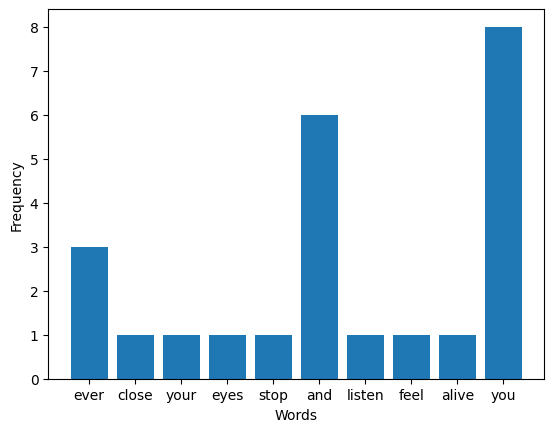

In [13]:
plt.bar(list(fdist.keys())[0:10],list(fdist.values())[0:10])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

In [19]:
## UniGram Model

#Using NLTK we can normalize the frequency values by dividing them by the total count
#of each word we get a probability function, we can fine the probability of each word
C=sum(fdist.values())
print(C)

#We can find the probability of the word wish i.w  P(wild)
fdist['wild']/C

# We can also find each individual word by converting our tokens to a set
vocabulary=set(tokens)

306


How Unigram model predicts the next likely word
Let's consider a scenario from the above example where we ask the unigram model to predict the next word following the sequence 'I like'.

If the highest probability among all words is "I" with a probability 0.25, then according to the model, the most likely next word after 'I like' would be 'I'. However, this prediction doesn't make sense at all. This highlights a significant limitation of the unigram model—it lacks context, and its predictions are entirely dependent on the word with the highest probability "I" in this case

Even if multiple words have the same highest probabilities, it will randomly choose any one word out of all the options.

In [15]:
## BiGram Model

#bigrams is a function provided by the Natural Language Toolkit (NLTK) library in Python.
# This function takes a sequence of tokens as input and returns an iterator over consecutive pairs of tokens, forming bigrams.
bigrams = nltk.bigrams(tokens)
print(bigrams)

<generator object bigrams at 0x7c414995ab20>


In [16]:
#We can convert a generator into a list, where each element of the list is a bigram.
my_bigrams=list(nltk.bigrams(tokens))

#We can see the first 10 bigrams
my_bigrams[0:10]

[('ever', 'close'),
 ('close', 'your'),
 ('your', 'eyes'),
 ('eyes', 'ever'),
 ('ever', 'stop'),
 ('stop', 'and'),
 ('and', 'listen'),
 ('listen', 'ever'),
 ('ever', 'feel'),
 ('feel', 'alive')]

In [17]:
#We compute the frequency distribution of the bigram  C(wt,wt−1)  using the NLTK functionbigrams.
freq_bigrams  = nltk.FreqDist(nltk.bigrams(tokens))
freq_bigrams

FreqDist({('what', 'a'): 32, ('da', 'da'): 25, ('a', 'day'): 20, ('a', 'way'): 12, ('day', 'what'): 10, ('day', 'to'): 10, ('to', 'take'): 10, ('take', 'to'): 10, ('way', 'what'): 6, ('way', 'to'): 6, ...})

In [21]:
#We can provide you with the first 10 values of the frequency distribution
for my_bigram in  my_bigrams[0:10]:
    print(my_bigram)
    print(freq_bigrams[my_bigram])

('ever', 'close')
1
('close', 'your')
1
('your', 'eyes')
1
('eyes', 'ever')
1
('ever', 'stop')
1
('stop', 'and')
1
('and', 'listen')
1
('listen', 'ever')
1
('ever', 'feel')
1
('feel', 'alive')
1


In [35]:
##Here, you can generate the conditional distribution by normalizing the frequency distribution of unigrams.
#In this case, we are doing it for the word 'wild' and then sorting the results:

word="wild"
vocab_probabilities={}
for next_word in vocabulary:
    vocab_probabilities[next_word]=freq_bigrams[(word,next_word)]/fdist[word]

vocab_probabilities=sorted(vocab_probabilities.items(), key=lambda x:x[1],reverse=True)
vocab_probabilities[0:4]

[('child', 1.0), ('surround', 0.0), ('find', 0.0), ('listen', 0.0)]

In [23]:
#We can create a function to calculate the conditional probability of  Wt  given  Wt−1 , sort the results, and output them as a list.

def make_predictions(my_words, freq_grams, normlize=1, vocabulary=vocabulary):
    """
    Generate predictions for the conditional probability of the next word given a sequence.

    Args:
        my_words (list): A list of words in the input sequence.
        freq_grams (dict): A dictionary containing frequency of n-grams.
        normlize (int): A normalization factor for calculating probabilities.
        vocabulary (list): A list of words in the vocabulary.

    Returns:
        list: A list of predicted words along with their probabilities, sorted in descending order.
    """

    vocab_probabilities = {}  # Initialize a dictionary to store predicted word probabilities

    context_size = len(list(freq_grams.keys())[0])  # Determine the context size from n-grams keys

    # Preprocess input words and take only the relevant context words
    my_tokens = preprocess(my_words)[0:context_size - 1]

    # Calculate probabilities for each word in the vocabulary given the context
    for next_word in vocabulary:
        temp = my_tokens.copy()
        temp.append(next_word)  # Add the next word to the context

        # Calculate the conditional probability using the frequency information
        if normlize!=0:
            vocab_probabilities[next_word] = freq_grams[tuple(temp)] / normlize
        else:
            vocab_probabilities[next_word] = freq_grams[tuple(temp)]
    # Sort the predicted words based on their probabilities in descending order
    vocab_probabilities = sorted(vocab_probabilities.items(), key=lambda x: x[1], reverse=True)

    return vocab_probabilities  # Return the sorted list of predicted words and their probabilities

In [30]:
len(list(freq_bigrams.keys())[0])

2

In [31]:
my_words="wild child of course"

vocab_probabilities=make_predictions(my_words,freq_bigrams,normlize=fdist['i'])
vocab_probabilities[0:10]

[('child', 5),
 ('surround', 0),
 ('find', 0),
 ('listen', 0),
 ('ever', 0),
 ('eyes', 0),
 ('ve', 0),
 ('way', 0),
 ('your', 0),
 ('everything', 0)]

In [28]:
# We can generate a sequence using our Bigram Model by leveraging the
#preceding word (t-1) to predict and generate the subsequent word in the sequence.

my_song=""
for w in tokens[0:100]:
  my_word=make_predictions(w,freq_bigrams)[0][0]
  my_song+=" "+my_word

my_song

' stop your eyes ever stop and on ever stop alive and on do nothing missing you do nt need a day let the day what on and on and the day go down everywhere around you do into it through let the day what you do do nt need a day let the day go on and on and a day what a day what take to take a day what a day what take it through what a day what a day what take to take day child what take to day from the day skelter every spring what'

In [37]:
# We can create a sequence using our n-gram model by initiating the process with the first word in the sequence and producing an initial output.
#Subsequently, we utilize this output as the basis for generating the next word in the sequence.
#i.e we Give our model a word, then use the output to predict the next word and repeat.

my_word="Mourya"
my_song =""
for i in range(100):
    my_word=make_predictions(my_word,freq_bigrams)[0][0]
    my_song+=" "+my_word

my_song

' surround you do nt need a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day what a day'

In [39]:
##TriGram Model

freq_trigrams  = nltk.FreqDist(nltk.trigrams(tokens))
freq_trigrams

FreqDist({('da', 'da', 'da'): 23, ('what', 'a', 'day'): 20, ('what', 'a', 'way'): 12, ('a', 'day', 'what'): 10, ('day', 'what', 'a'): 10, ('a', 'day', 'to'): 10, ('day', 'to', 'take'): 10, ('to', 'take', 'to'): 10, ('a', 'way', 'what'): 6, ('way', 'what', 'a'): 6, ...})

In [40]:
make_predictions("close your eyes",freq_trigrams,normlize=freq_bigrams[("what","a")] )[0:10]

[('eyes', 0.03125),
 ('surround', 0.0),
 ('find', 0.0),
 ('listen', 0.0),
 ('ever', 0.0),
 ('child', 0.0),
 ('ve', 0.0),
 ('way', 0.0),
 ('your', 0.0),
 ('everything', 0.0)]

In [42]:
my_song=""

w1=tokens[0]
for w2 in tokens[0:100]:
    gram=w1+' '+w2
    my_word=make_predictions(gram,freq_trigrams )[0][0]
    my_song+=" "+my_word
    w1=w2

my_song

' surround your eyes ever stop and listen ever feel alive and you ve nothing missing you do nt need a reason let the day go on and on what the day go down everywhere around you give into it now let the day go you you do nt need a reason let the day go on and on what a day what a day what take to a a day what a day what make it through what a day what a day what take to a wild child what take the time from the helter skelter every day you'

There are various challenges associated with Histogram-Based Methods, some of which are quite straightforward. For instance, when considering the case of having N words in our vocabulary, an Unigram model would entail N bins, while a Bigram model would result in N squared bins and so forth.

N-gram models also encounter limitations in terms of contextual understanding and their ability to capture intricate word relationships. For instance, let's consider the phrases `I hate dogs`, `I don’t like dogs`, and **don’t like** means **dislike**. Within this context, a histogram-based approach would fail to grasp the significance of the phrase **don’t like** means **dislike**, thereby missing out on the essential semantic relationship it encapsulates.
